In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import re
from termcolor import colored
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df_software = pd.read_json('data/Software_5.json', lines = True, encoding='utf-8')
df_science = pd.read_json('data/Industrial_and_Scientific_5.json', lines = True,encoding='utf-8')

In [3]:
df = pd.concat([df_software, df_science])

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN
3,5,False,"10 12, 2010",AYUF7YETYOLNX,0321719816,{'Format:': ' DVD-ROM'},Bryan Newman,I've been creating websites with Dreamweaver f...,A Fantastic Overview of Dream Weaver and Web D...,1286841600,NaN,NaN
4,5,False,"10 7, 2010",A31ICLWQ9CSHRS,0321719816,{'Format:': ' DVD-ROM'},Al Swanson,I decided (after trying a number of other prod...,Excellent Tutorials!,1286409600,NaN,NaN


In [5]:
df_text = df['reviewText'].values
df_score = df['overall'].values

In [6]:
text = []
score = []
c = 0 

for i in range(len(df_text)):
    if str(df_text[i]) != "nan":
        text.append(df_text[i])
        score.append(df_score[i])
    else:
        c += 1
        print(i)

10403
13408
27552
31618
34206
48518
51076
54791
54792
56802
68774
69215


In [7]:
def cleanText(string, ):
    # print(colored('---------- NEW ----------', 'green', attrs=['bold']))
    # print(string)
    string = re.sub(r"[-()\"#/@;:<>{}+=./|.!?,~]", "", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    # print(colored('---------- CLEAN ----------', 'green', attrs=['bold']))
    # print(string.strip().lower())
    return string.strip().lower()

In [8]:
cleanT = []
for t in text:
    cleanT.append(cleanText(t))

In [10]:
stop_words =  ['if', 'do', '\'ve' , 'program' , 'window',  'windows', 'even' ,  'computer' ,'product' ,'software' ,'\'ll' , 'use', 'used', 'one' ,'n\'t' , '\'re' , '\'s' ,'few', "it's", "shouldn't", 'myself', 'its', 'has', 'with', 'been', 'can', 'won', "you'll", 'below', "weren't", 'into', 'him', 'this', 'above', 'our', "needn't", 'here', 'i', 'me', 'all', 're', "won't", 'don', 'should', 'such', 'or', 'for', "couldn't", 'what', "should've", 'does', 'hers', 'other', "that'll", "doesn't", "wasn't", 'once', 'while', 'between', 'mightn', "hasn't", 'too', 'up', 'before', 'their', 'himself', 'it', "you'd", 'some', 'themselves', 'ain', 'an', 'ours', 'at', 'haven', 'about', 'just', 'shouldn', 'o', 'both', 'out', "isn't", 'll', 'ma', 'you', "haven't", 'only', 'hadn', 'those', 'they', 'against', 'down', 'over', 't', 'she', 'again', 'why', 'did', 'wouldn', 'a', 'when', 'your', 'ourselves', 'who', 'having', 'on', 'y', 'theirs', 'being', 'herself', 'nor', 'that', 'by', "don't", "mustn't", "shan't", 'because', 'not', 'under', 'are', 'he', 'own', "you've", 'there', 'yours', 'and', 'most', "mightn't", 'have', 'doing', 'during', 'couldn', "didn't", 'will', 'weren', 'd', 'were', "she's", "wouldn't", 'isn', 'then', 'doesn', 'wasn', 'itself', 'now', 'didn', 'these', 'them', 'needn', 'yourself', 'shan', 'is', 'more', 'be', "you're", 'than', 'after', 'aren', 'how', 'where', 'which', 'in', "hadn't", 'further', 'no', 'yourselves', 'as', 'whom', 'to', 'hasn', 'mustn', 'through', 'the', 'm', 's', 'very', 'we', 'each', 'until', 'same', "aren't", 'was', 'my', 'so', 'from', 've', 'am', 'had', 'his', 'but', 'off', 'any', 'of', 'her']
punctuation = list(string.punctuation)
stop = stop_words + punctuation

In [11]:
clean_text = []

for s in cleanT:
    sentence = s
    sent_words = sentence.split()
    words = [i for i in sent_words if i not in stop]
    output = ' '.join(words)
    clean_text.append(output)

In [12]:
positive_reviews = []
positive_score = []
negative_reviews = []
negative_score = []

for i in range(len(score)):
    if score[i] == 5:
        positive_reviews.append(clean_text[i])
        positive_score.append(score[i])
    elif score[i] == 1:
        negative_reviews.append(clean_text[i])
        negative_score.append(score[i])

In [13]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(str(data))
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color=color, width=2500, height=2000).generate(data)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [14]:
negative_words = ""

for i in range(len(negative_reviews)):
    negative_words += str(negative_reviews[i])

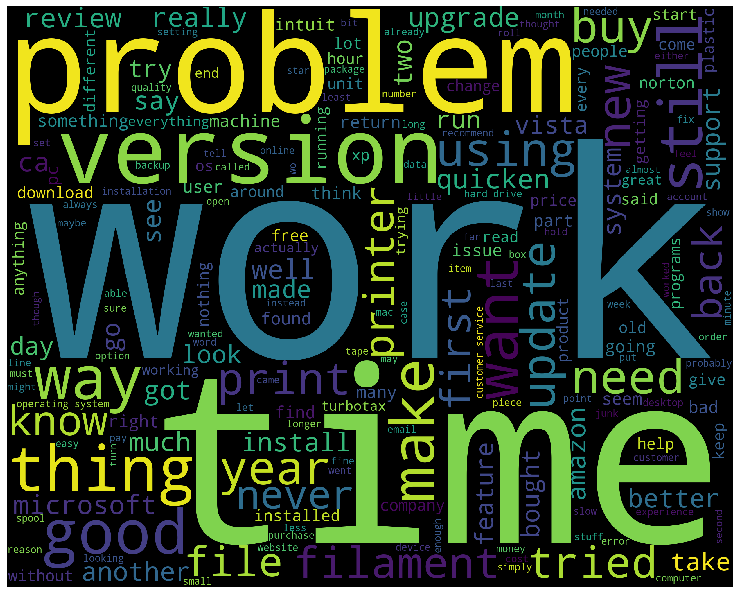

In [15]:
wordcloud_draw(negative_words)

In [16]:
positive_words = ""

for i in range(len(positive_reviews[0:1000])):
    positive_words += str(positive_reviews[i])

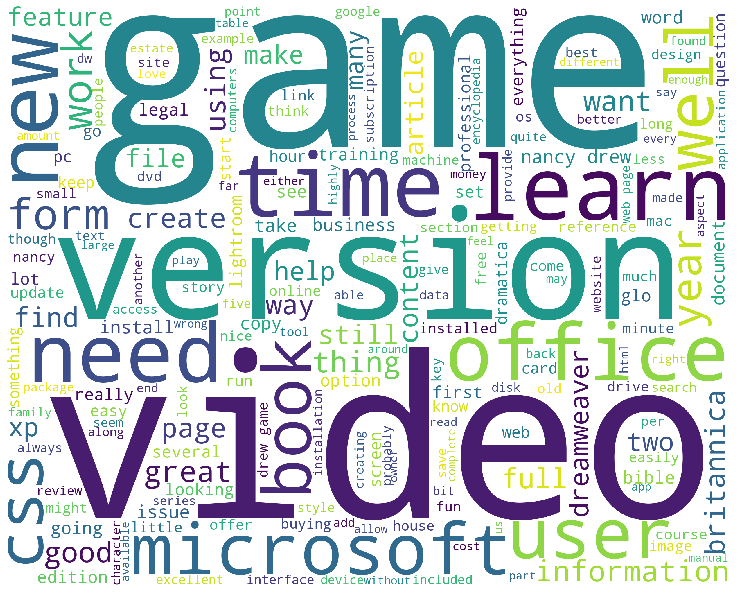

In [17]:
wordcloud_draw(positive_words, 'white')